## Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import hmean
import lda
from sklearn.metrics import roc_auc_score, roc_curve, auc, \
                            precision_recall_curve, average_precision_score

import tokenizers as t
import lda_implementation


## Get the Data

In [6]:
# read in data (2nd subset)
filtered_10K = pd.read_csv('datasets/2nd_10K_filtered_restaurant_reviews.csv', encoding='utf-8')

coded = pd.read_excel('datasets/manually_coded_reviews.xlsx', encoding='utf-8')
coded.fillna(0, inplace=True)
coded['serv'] = (coded.service + coded.staff).apply(lambda x: 1 if x > 0 else 0)
coded['pos_serv'] = (coded.pos_service + coded.pos_staff).apply(lambda x: 1 if x > 0 else 0)
coded['neg_serv'] = (coded.neg_service + coded.neg_staff).apply(lambda x: 1 if x > 0 else 0)
coded.drop(['service', 'staff', 'pos_service', 'pos_staff', 'neg_service', 'neg_staff'], axis=1, inplace=True)
coded.drop(['ambiance', 'cleanliness', 'pos_amb', u'neg_amb', 'pos_clean', 'neg_clean'], axis=1, inplace=True)

rest1 = pd.read_excel('datasets/one_business_categorized.xlsx', encoding='utf-8')
rest1.fillna(0, inplace=True)
rest1['serv'] = (rest1.service + rest1.staff).apply(lambda x: 1 if x > 0 else 0)
rest1['pos_serv'] = (rest1.pos_service + rest1.pos_staff).apply(lambda x: 1 if x > 0 else 0)
rest1['neg_serv'] = (rest1.neg_service + rest1.neg_staff).apply(lambda x: 1 if x > 0 else 0)
rest1.drop(['service', 'staff', 'pos_service', 'pos_staff', 'neg_service', 'neg_staff'], axis=1, inplace=True)
rest1.drop(['ambiance', 'cleanliness', 'pos_amb', u'neg_amb', 'pos_clean', 'neg_clean'], axis=1, inplace=True)

rest2 = pd.read_excel('datasets/cat20rest1.xlsx', encoding='utf-8')
rest2.fillna(0, inplace=True)
rest2['serv'] = (rest2.service + rest2.staff).apply(lambda x: 1 if x > 0 else 0)
rest2['pos_serv'] = (rest2.pos_service + rest2.pos_staff).apply(lambda x: 1 if x > 0 else 0)
rest2['neg_serv'] = (rest2.neg_service + rest2.neg_staff).apply(lambda x: 1 if x > 0 else 0)
rest2.drop(['service', 'staff', 'pos_service', 'pos_staff', 'neg_service', 'neg_staff'], axis=1, inplace=True)
rest2.drop(['ambiance', 'cleanliness', 'pos_amb', u'neg_amb', 'pos_clean', 'neg_clean'], axis=1, inplace=True)

rest3 = pd.read_excel('datasets/cat20rest2.xlsx', encoding='utf-8')
rest3.fillna(0, inplace=True)
rest3['serv'] = (rest3.service + rest3.staff).apply(lambda x: 1 if x > 0 else 0)
rest3['pos_serv'] = (rest3.pos_service + rest3.pos_staff).apply(lambda x: 1 if x > 0 else 0)
rest3['neg_serv'] = (rest3.neg_service + rest3.neg_staff).apply(lambda x: 1 if x > 0 else 0)
rest3.drop(['service', 'staff', 'pos_service', 'pos_staff', 'neg_service', 'neg_staff'], axis=1, inplace=True)
rest3.drop(['ambiance', 'cleanliness', 'pos_amb', u'neg_amb', 'pos_clean', 'neg_clean'], axis=1, inplace=True)

rest4 = pd.read_excel('datasets/cat20rest3.xlsx', encoding='utf-8')
rest4.fillna(0, inplace=True)
rest4['serv'] = (rest4.service + rest4.staff).apply(lambda x: 1 if x > 0 else 0)
rest4['pos_serv'] = (rest4.pos_service + rest4.pos_staff).apply(lambda x: 1 if x > 0 else 0)
rest4['neg_serv'] = (rest4.neg_service + rest4.neg_staff).apply(lambda x: 1 if x > 0 else 0)
rest4.drop(['service', 'staff', 'pos_service', 'pos_staff', 'neg_service', 'neg_staff'], axis=1, inplace=True)
rest4.drop(['ambiance', 'cleanliness', 'pos_amb', u'neg_amb', 'pos_clean', 'neg_clean'], axis=1, inplace=True)

## Perform LDA

In [7]:
# prepare
cout_vect, rev_vec, rev_badlines = t.fitApplyVectorizer(filtered_10K.text, t.foodwordPolarityTokenizer)
reviews = filtered_10K.copy()
reviews = reviews[reviews.text.apply(lambda x: False if x in rev_badlines else True)]

code_vec, code_badlines = t.applyVectorizer(coded.text, t.foodwordPolarityTokenizer, cout_vect)
code_rev = coded.copy()
code_rev = code_rev[code_rev.text.apply(lambda x: False if x in code_badlines else True)]

rest1_vec, rest1_badlines = t.applyVectorizer(rest1.text, t.foodwordPolarityTokenizer, cout_vect)
rest1_rev = rest1.copy()
rest1_rev = rest1_rev[rest1_rev.text.apply(lambda x: False if x in code_badlines else True)]

rest2_vec, rest2_badlines = t.applyVectorizer(rest2.text, t.foodwordPolarityTokenizer, cout_vect)
rest2_rev = rest2.copy()
rest2_rev = rest2_rev[rest2_rev.text.apply(lambda x: False if x in code_badlines else True)]

rest3_vec, rest3_badlines = t.applyVectorizer(rest3.text, t.foodwordPolarityTokenizer, cout_vect)
rest3_rev = rest3.copy()
rest3_rev = rest3_rev[rest3_rev.text.apply(lambda x: False if x in code_badlines else True)]

rest4_vec, rest4_badlines = t.applyVectorizer(rest4.text, t.foodwordPolarityTokenizer, cout_vect)
rest4_rev = rest4.copy()
rest4_rev = rest4_rev[rest4_rev.text.apply(lambda x: False if x in code_badlines else True)]

In [8]:
# fit
bestLDA = lda.LDA(n_topics=20, alpha=0.1, eta=0.01, random_state=1)
bestLDA.fit(rev_vec)

INFO:lda:n_documents: 9720
INFO:lda:vocab_size: 19828
INFO:lda:n_words: 636471
INFO:lda:n_topics: 20
INFO:lda:n_iter: 2000
INFO:lda:<0> log likelihood: -6525808
INFO:lda:<10> log likelihood: -5105033
INFO:lda:<20> log likelihood: -4905774
INFO:lda:<30> log likelihood: -4812305
INFO:lda:<40> log likelihood: -4763327
INFO:lda:<50> log likelihood: -4732065
INFO:lda:<60> log likelihood: -4707262
INFO:lda:<70> log likelihood: -4690435
INFO:lda:<80> log likelihood: -4677105
INFO:lda:<90> log likelihood: -4666380
INFO:lda:<100> log likelihood: -4657755
INFO:lda:<110> log likelihood: -4647415
INFO:lda:<120> log likelihood: -4644679
INFO:lda:<130> log likelihood: -4638895
INFO:lda:<140> log likelihood: -4633075
INFO:lda:<150> log likelihood: -4627925
INFO:lda:<160> log likelihood: -4625528
INFO:lda:<170> log likelihood: -4622658
INFO:lda:<180> log likelihood: -4621482
INFO:lda:<190> log likelihood: -4615660
INFO:lda:<200> log likelihood: -4614925
INFO:lda:<210> log likelihood: -4613466
INFO:lda

<lda.lda.LDA instance at 0x126948908>

In [9]:
best_topics = lda_implementation.bestTopics(bestLDA, code_vec, code_rev)
best_topics

{'neg_food': ('topic_0', 'topic_17'),
 'neg_price': ('topic_0', 'topic_17'),
 'neg_serv': ('topic_6', 'topic_19'),
 'neg_wait': ('topic_0', 'topic_19'),
 'pos_food': ('topic_2', 'topic_15'),
 'pos_price': ('topic_4', 'topic_13'),
 'pos_serv': ('topic_9',),
 'pos_wait': ('topic_7', 'topic_13')}

### Look at ROC, Precision-Recall Curve, and thresholds

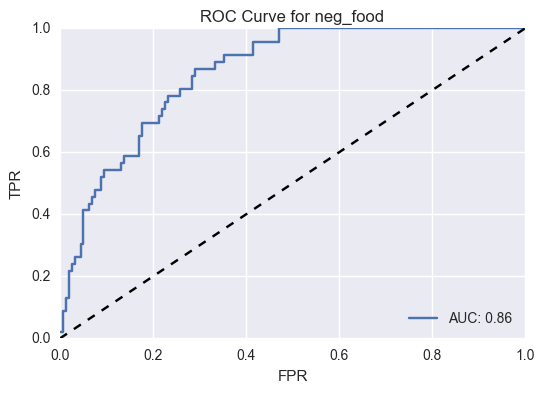

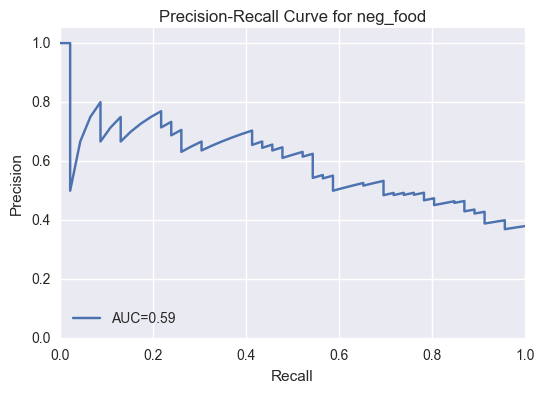

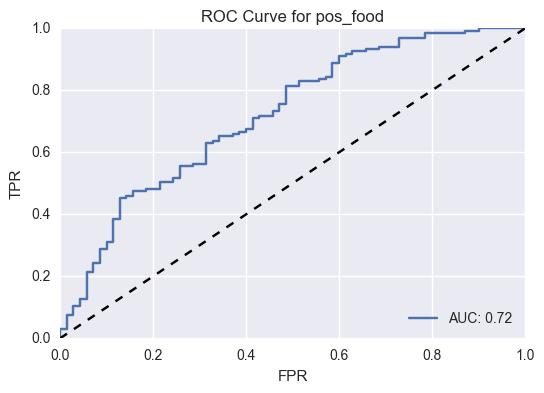

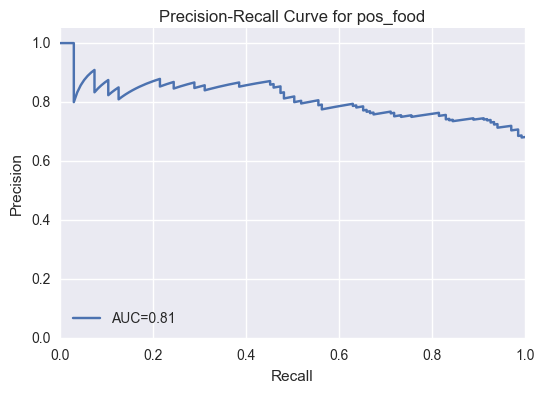

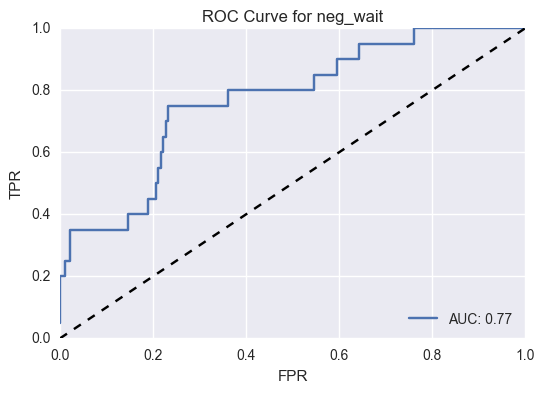

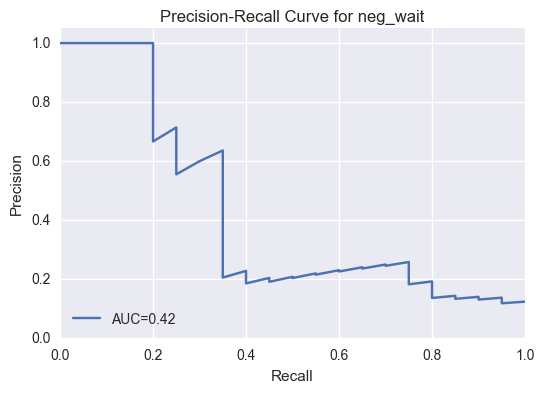

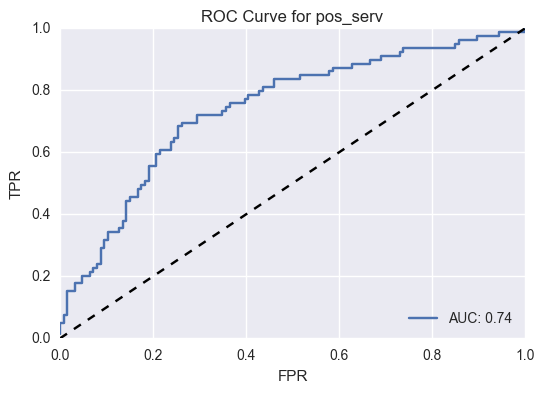

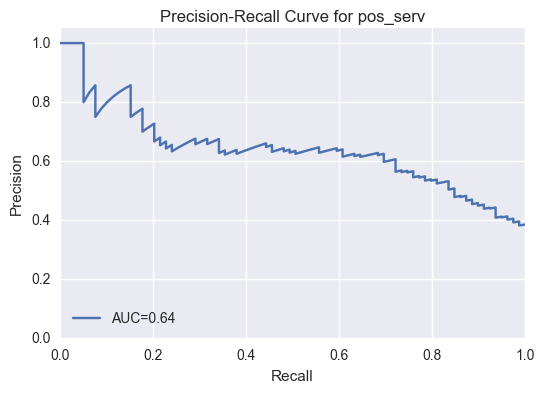

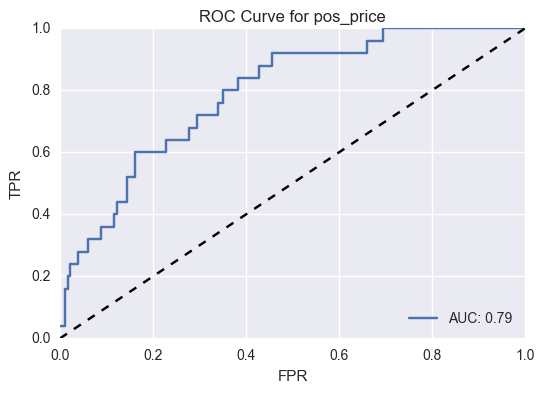

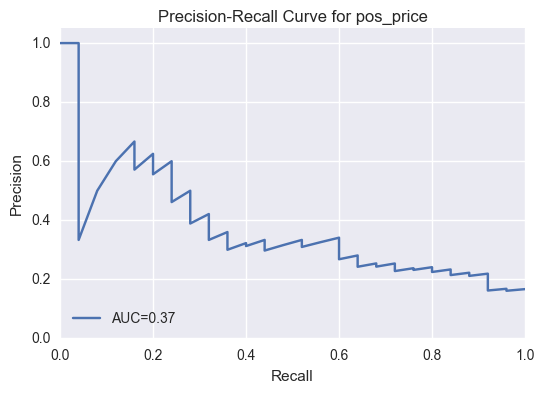

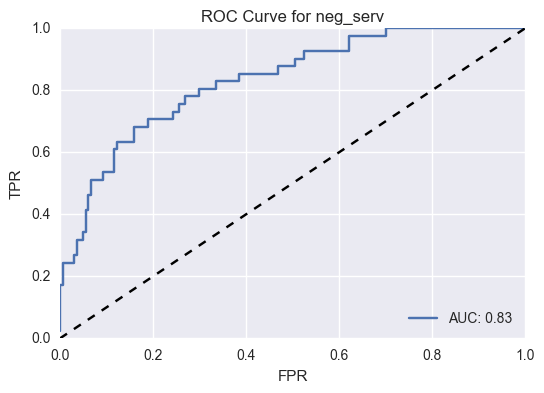

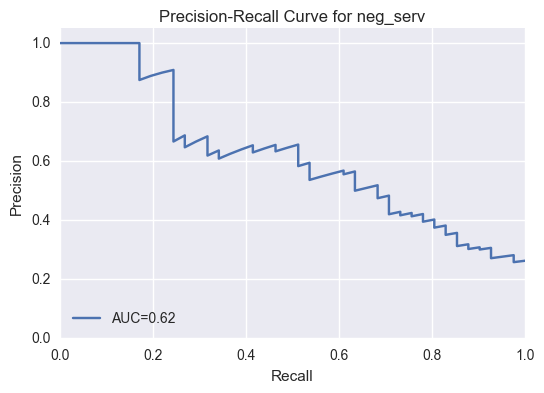

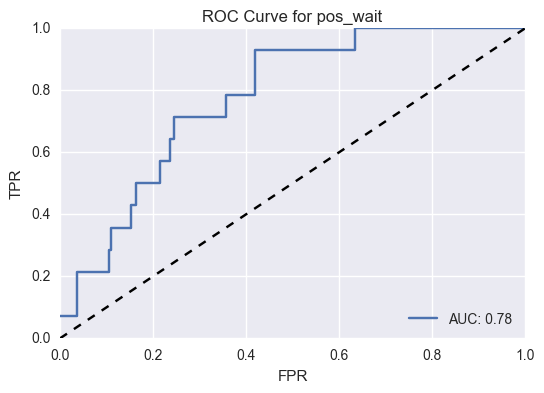

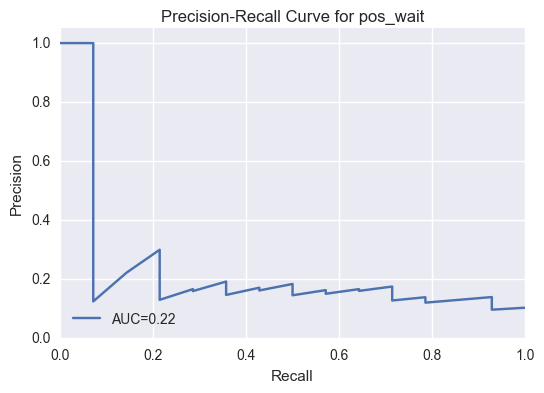

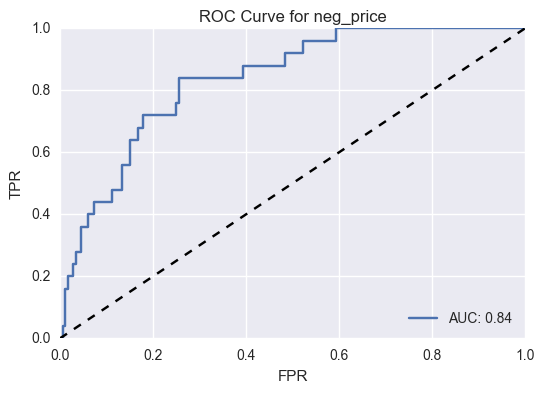

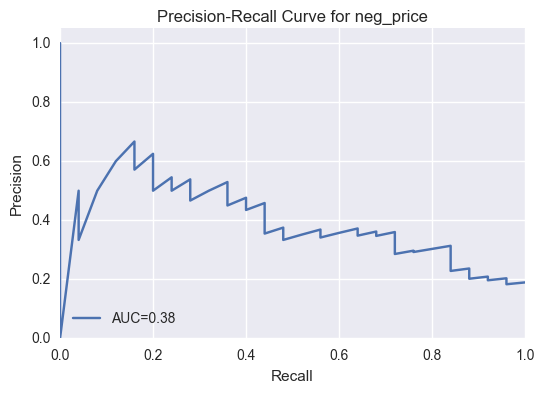

In [10]:
for column, best_tops in best_topics.items():
    auc_df, prc_df = lda_implementation.getCurves(bestLDA, code_vec, column, best_tops, code_rev)

In [12]:
best_topics2 = {}
for column, best_tops in best_topics.items():
    if column in ['pos_food', 'neg_food', 'pos_serv', 'neg_serv', 'neg_price']:
        best_topics2[column] = best_tops
best_topics2

{'neg_food': ('topic_0', 'topic_17'),
 'neg_price': ('topic_0', 'topic_17'),
 'neg_serv': ('topic_6', 'topic_19'),
 'pos_food': ('topic_2', 'topic_15'),
 'pos_serv': ('topic_9',)}

In [13]:
best_thresholds = {}
for column, best_tops in best_topics2.items():
    imp = lda_implementation.bestThreshold3(bestLDA, code_vec, column, best_tops, code_rev)
    best_thresholds[column] = imp

In [14]:
best_thresholds

{'neg_food': 0.26925960009598882,
 'neg_price': 0.23348311194622021,
 'neg_serv': 0.22448270973670648,
 'pos_food': 0.079143429767158671,
 'pos_serv': 0.074970606559024572}

In [15]:
dic = {"Category": [],
    "Test_set_total": [],
    "Test_set_PREDtotal": [],
    "Test_set_accuracy": [],
    "Test_set_precision": [],
    "Test_set_recall": [],
    "Restaurant_1_total": [],
    "Restaurant_1_PREDtotal": [],
    "Restaurant_1_accuracy": [],
    "Restaurant_1_precision": [],
    "Restaurant_1_recall": [],
    "Restaurant_2_total": [],
    "Restaurant_2_PREDtotal": [],
    "Restaurant_2_accuracy": [],
    "Restaurant_2_precision": [],
    "Restaurant_2_recall": [],
    "Restaurant_3_total": [],
    "Restaurant_3_PREDtotal": [],
    "Restaurant_3_accuracy": [],
    "Restaurant_3_precision": [],
    "Restaurant_3_recall": [],
    "Restaurant_4_total": [],
    "Restaurant_4_PREDtotal": [],
    "Restaurant_4_accuracy": [],
    "Restaurant_4_precision": [],
    "Restaurant_4_recall": []
}
for column, best_tops in best_topics2.items():
    dic["Category"] += [column]
for column, best_tops in best_topics2.items():
    total, PREDtotal, acc, prec, rec = lda_implementation.restaurantSummary(bestLDA, code_vec, column, best_tops, code_rev, best_thresholds[column])
    dic["Test_set_total"] += [total]
    dic["Test_set_PREDtotal"] += [PREDtotal]
    dic["Test_set_accuracy"] += [acc]
    dic["Test_set_precision"] += [prec]
    dic["Test_set_recall"] += [rec]
for column, best_tops in best_topics2.items():
    total, PREDtotal, acc, prec, rec = lda_implementation.restaurantSummary(bestLDA, rest1_vec, column, best_tops, rest1_rev, best_thresholds[column])
    dic["Restaurant_1_total"] += [total]
    dic["Restaurant_1_PREDtotal"] += [PREDtotal]
    dic["Restaurant_1_accuracy"] += [acc]
    dic["Restaurant_1_precision"] += [prec]
    dic["Restaurant_1_recall"] += [rec]
for column, best_tops in best_topics2.items():
    total, PREDtotal, acc, prec, rec = lda_implementation.restaurantSummary(bestLDA, rest2_vec, column, best_tops, rest2_rev, best_thresholds[column])
    dic["Restaurant_2_total"] += [total]
    dic["Restaurant_2_PREDtotal"] += [PREDtotal]
    dic["Restaurant_2_accuracy"] += [acc]
    dic["Restaurant_2_precision"] += [prec]
    dic["Restaurant_2_recall"] += [rec]
for column, best_tops in best_topics2.items():
    total, PREDtotal, acc, prec, rec = lda_implementation.restaurantSummary(bestLDA, rest3_vec, column, best_tops, rest3_rev, best_thresholds[column])
    dic["Restaurant_3_total"] += [total]
    dic["Restaurant_3_PREDtotal"] += [PREDtotal]
    dic["Restaurant_3_accuracy"] += [acc]
    dic["Restaurant_3_precision"] += [prec]
    dic["Restaurant_3_recall"] += [rec]
for column, best_tops in best_topics2.items():
    total, PREDtotal, acc, prec, rec = lda_implementation.restaurantSummary(bestLDA, rest4_vec, column, best_tops, rest4_rev, best_thresholds[column])
    dic["Restaurant_4_total"] += [total]
    dic["Restaurant_4_PREDtotal"] += [PREDtotal]
    dic["Restaurant_4_accuracy"] += [acc]
    dic["Restaurant_4_precision"] += [prec]
    dic["Restaurant_4_recall"] += [rec]

ACTUAL: neg_food: 0.224390243902
PREDICTED: neg_food: 0.180487804878
Accuracy: 0.819512195122, Precision: 0.621621621622, Recall: 0.5


ACTUAL: neg_price: 0.121951219512
PREDICTED: neg_price: 0.20487804878
Accuracy: 0.819512195122, Precision: 0.357142857143, Recall: 0.6


ACTUAL: neg_serv: 0.2
PREDICTED: neg_serv: 0.151219512195
Accuracy: 0.843902439024, Precision: 0.645161290323, Recall: 0.487804878049


ACTUAL: pos_food: 0.658536585366
PREDICTED: pos_food: 0.4
Accuracy: 0.59512195122, Precision: 0.817073170732, Recall: 0.496296296296


ACTUAL: pos_serv: 0.385365853659
PREDICTED: pos_serv: 0.326829268293
Accuracy: 0.707317073171, Precision: 0.641791044776, Recall: 0.544303797468
ACTUAL: neg_food: 0.204081632653
PREDICTED: neg_food: 0.183673469388
Accuracy: 0.897959183673, Precision: 0.777777777778, Recall: 0.7


//anaconda/envs/py27/lib/python2.7/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


ACTUAL: neg_price: 0.0
PREDICTED: neg_price: 0.204081632653
Accuracy: 0.795918367347, Precision: 0.0, Recall: 0.0
ACTUAL: neg_serv: 0.0408163265306
PREDICTED: neg_serv: 0.0408163265306
Accuracy: 0.918367346939, Precision: 0.0, Recall: 0.0


ACTUAL: pos_food: 0.775510204082
PREDICTED: pos_food: 0.102040816327
Accuracy: 0.285714285714, Precision: 0.8, Recall: 0.105263157895
ACTUAL: pos_serv: 0.387755102041
PREDICTED: pos_serv: 0.612244897959
Accuracy: 0.530612244898, Precision: 0.433333333333, Recall: 0.684210526316
ACTUAL: neg_food: 0.263157894737
PREDICTED: neg_food: 0.210526315789
Accuracy: 0.631578947368, Precision: 0.25, Recall: 0.2


ACTUAL: neg_price: 0.105263157895
PREDICTED: neg_price: 0.315789473684
Accuracy: 0.578947368421, Precision: 0.0, Recall: 0.0
ACTUAL: neg_serv: 0.157894736842
PREDICTED: neg_serv: 0.210526315789
Accuracy: 0.947368421053, Precision: 0.75, Recall: 1.0
ACTUAL: pos_food: 0.578947368421
PREDICTED: pos_food: 0.315789473684
Accuracy: 0.526315789474, Precision: 0.666666666667, Recall: 0.363636363636
ACTUAL: pos_serv: 0.157894736842
PREDICTED: pos_serv: 0.157894736842
Accuracy: 0.894736842105, Precision: 0.666666666667, Recall: 0.666666666667


ACTUAL: neg_food: 0.35
PREDICTED: neg_food: 0.2
Accuracy: 0.75, Precision: 0.75, Recall: 0.428571428571
ACTUAL: neg_price: 0.05
PREDICTED: neg_price: 0.35
Accuracy: 0.7, Precision: 0.142857142857, Recall: 1.0
ACTUAL: neg_serv: 0.1
PREDICTED: neg_serv: 0.15
Accuracy: 0.85, Precision: 0.333333333333, Recall: 0.5
ACTUAL: pos_food: 0.65
PREDICTED: pos_food: 0.25
Accuracy: 0.6, Precision: 1.0, Recall: 0.384615384615


ACTUAL: pos_serv: 0.4
PREDICTED: pos_serv: 0.25
Accuracy: 0.65, Precision: 0.6, Recall: 0.375
ACTUAL: neg_food: 0.35
PREDICTED: neg_food: 0.3
Accuracy: 0.85, Precision: 0.833333333333, Recall: 0.714285714286
ACTUAL: neg_price: 0.05
PREDICTED: neg_price: 0.35
Accuracy: 0.7, Precision: 0.142857142857, Recall: 1.0
ACTUAL: neg_serv: 0.15
PREDICTED: neg_serv: 0.1
Accuracy: 0.95, Precision: 1.0, Recall: 0.666666666667


ACTUAL: pos_food: 0.5
PREDICTED: pos_food: 0.1
Accuracy: 0.5, Precision: 0.5, Recall: 0.1
ACTUAL: pos_serv: 0.1
PREDICTED: pos_serv: 0.2
Accuracy: 0.8, Precision: 0.25, Recall: 0.5


In [16]:
df = pd.DataFrame(dic)

In [17]:
# re-order columns
df = df[['Category',
    'Test_set_total',
    'Test_set_PREDtotal',
    'Test_set_recall',
    'Test_set_precision',
    'Test_set_accuracy',
    'Restaurant_1_total',
    'Restaurant_1_PREDtotal',
    'Restaurant_1_recall',
    'Restaurant_1_precision', 
    'Restaurant_1_accuracy',
    'Restaurant_2_total',
    'Restaurant_2_PREDtotal',
    'Restaurant_2_recall',
    'Restaurant_2_precision', 
    'Restaurant_2_accuracy',
    'Restaurant_3_total',
    'Restaurant_3_PREDtotal',
    'Restaurant_3_recall',
    'Restaurant_3_precision', 
    'Restaurant_3_accuracy',
    'Restaurant_4_total',
    'Restaurant_4_PREDtotal',
    'Restaurant_4_recall',
    'Restaurant_4_precision', 
    'Restaurant_4_accuracy']]

In [23]:
df

,Category,Test_set_total,Test_set_PREDtotal,Test_set_recall,Test_set_precision,Test_set_accuracy,Restaurant_1_total,Restaurant_1_PREDtotal,Restaurant_1_recall,Restaurant_1_precision,...,Restaurant_3_recall,Restaurant_3_precision,Restaurant_3_accuracy,Restaurant_4_total,Restaurant_4_PREDtotal,Restaurant_4_recall,Restaurant_4_precision,Restaurant_4_accuracy,average_recall,average_precision
0,neg_food,0.224390,0.180488,0.500000,0.621622,0.819512,0.204082,0.183673,0.700000,0.777778,...,0.428571,0.750000,0.75,0.35,0.30,0.714286,0.833333,0.85,0.508571,0.646547
1,neg_price,0.121951,0.204878,0.600000,0.357143,0.819512,0.000000,0.204082,0.000000,0.000000,...,1.000000,0.142857,0.70,0.05,0.35,1.000000,0.142857,0.70,0.520000,0.128571
2,neg_serv,0.200000,0.151220,0.487805,0.645161,0.843902,0.040816,0.040816,0.000000,0.000000,...,0.500000,0.333333,0.85,0.15,0.10,0.666667,1.000000,0.95,0.530894,0.545699
3,pos_food,0.658537,0.400000,0.496296,0.817073,0.595122,0.775510,0.102041,0.105263,0.800000,...,0.384615,1.000000,0.60,0.50,0.10,0.100000,0.500000,0.50,0.289962,0.756748
4,pos_serv,0.385366,0.326829,0.544304,0.641791,0.707317,0.387755,0.612245,0.684211,0.433333,...,0.375000,0.600000,0.65,0.10,0.20,0.500000,0.250000,0.80,0.554036,0.518358


In [20]:
df['average_recall'] = (df['Test_set_recall'] + df['Restaurant_1_recall'] + \
    df['Restaurant_2_recall'] + df['Restaurant_3_recall'] + df['Restaurant_4_recall'])/5
df['average_precision'] = (df['Test_set_precision'] + df['Restaurant_1_precision'] + \
    df['Restaurant_2_precision'] + df['Restaurant_3_precision'] + df['Restaurant_4_precision'])/5

In [21]:
df[['Category', 'average_recall', 'average_precision']]

,Category,average_recall,average_precision
0,neg_food,0.508571,0.646547
1,neg_price,0.520000,0.128571
2,neg_serv,0.530894,0.545699
3,pos_food,0.289962,0.756748
4,pos_serv,0.554036,0.518358


The model was unable to successfully work with the Bad Price topic, and didn't work great with the Good Service topic. However, the Bad Food, Good Food, and Bad Service topics are pretty good.

In [22]:
topic_word = bestLDA.topic_word_
n_top_words = 16
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(cout_vect.get_feature_names())[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    print(u'Topic {}: {}'.format(i, ' '.join(topic_words)))

Topic 0: negativeword foodword food place service bad just order time taste eat star cold restaurant say better
Topic 1: foodword positiveword negativeword steak meal good salad order wine cook restaurant dessert dish great dinner appetizer
Topic 2: foodword positiveword negativeword cream coffee sweet ice tea dessert chocolate cake delicious taste fresh love flavor
Topic 3: foodword positiveword breakfast buffet egg food brunch good negativeword pancake bacon vegas line morning come eat
Topic 4: foodword positiveword taco salsa mexican chip burrito bean good food chicken cheese negativeword sauce love tortilla
Topic 5: foodword positiveword sushi roll fish fresh order tuna negativeword hour happy spicy oyster come good eat
Topic 6: negativeword positiveword order time say customer ask tell just come service food location make manager know
Topic 7: foodword positiveword burger fry negativeword cheese good dog order onion hot bun bacon shake sweet make
Topic 8: positiveword foodword neg

#### Conclusions: This model did not settle on the exact same topics, though they are similar (e.g. Topics 0 and 17 on this model, which represent "Bad Food", is similar to topic 13 in the original model, which represented "Bad Food"). The precision and recall scores here were slightly different as well, though not terribly different. Therefore, the it may be beneficial to perform this process on a larger subset of data to see if the models would converge a bit more; however, this is not entirely necessary.